# Projeto 2 Aprendizado de maquina

### Membros:
### Enio Martinelli - RA:790891
### Fernando Cincinato - RA:790947

#### Aplicação dos algoritmos K-means e Apriori em dataset com dados de pacientes hospitalares, classificados por nível de prioridade.


  Este projeto tem como objetivo agrupar os pacientes hospitaleres de acordo com seu nível de prioridade através do algoritmo K-means, e extrair regras de associação entre os sintomas apresentados com o algoritmo Apriori.

Os dados utilizados e mais detalhes sobre eles podem ser encontrados [aqui](https://www.kaggle.com/datasets/hossamahmedaly/patient-priority-classification?resource=download&select=patient_priority.csv).

  O projeto foi realizado nas seguintes etapas:

1.   Visualição dos dados

2.   Análise e pré-processamento

3.   Aplicação dos algoritmos

# Importação dos dados



In [ ]:
#Importação do dataset
import pandas as pd
import numpy as np

df = pd.read_csv('patient_priority.csv')
aux = pd.read_csv('patient_priority.csv')
df

,Unnamed: 0,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type,smoking_status,triage
0,0,40.0,1.0,2.0,140.0,294.0,172.0,0.0,108.00,43.0,92.0,19.0,0.467386,0.0,0.0,Urban,never smoked,yellow
1,1,49.0,0.0,3.0,160.0,180.0,156.0,0.0,75.00,47.0,90.0,18.0,0.467386,0.0,0.0,Urban,never smoked,orange
2,2,37.0,1.0,2.0,130.0,294.0,156.0,0.0,98.00,53.0,102.0,23.0,0.467386,0.0,0.0,Urban,never smoked,yellow
3,3,48.0,0.0,4.0,138.0,214.0,156.0,1.0,72.00,51.0,118.0,18.0,0.467386,0.0,0.0,Urban,never smoked,orange
4,4,54.0,1.0,3.0,150.0,195.0,156.0,0.0,108.00,90.0,83.0,21.0,0.467386,0.0,0.0,Urban,never smoked,yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6957,5105,80.0,0.0,0.0,111.0,153.0,166.0,0.0,83.75,31.0,108.0,18.6,0.467386,1.0,0.0,Urban,never smoked,yellow
6958,5106,81.0,0.0,0.0,123.0,157.0,160.0,0.0,125.20,23.0,89.0,40.0,0.467386,0.0,0.0,Urban,never smoked,yellow
6959,5107,81.0,0.0,0.0,127.0,185.0,141.0,0.0,82.99,41.0,95.0,30.6,0.467386,0.0,0.0,Rural,never smoked,yellow
6960,5108,51.0,1.0,0.0,123.0,161.0,162.0,0.0,166.29,34.0,93.0,25.6,0.467386,0.0,0.0,Rural,formerly smoked,green


In [ ]:
#df = df.sort_values('triage')
#df

# Visualização dos dados

1.   Item da lista
2.   Item da lista



Text(0.5, 1.0, 'exercise angina')

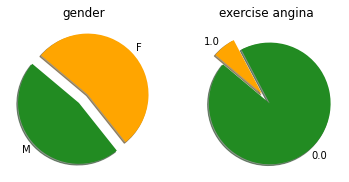

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


colors = ['forestgreen', 'orange', 'firebrick', 'gold']

plt.subplot(121)
plt.pie(df.groupby('gender').size(), explode=(0.1,0.1), labels=['M','F'], colors=colors, shadow=True, startangle=140)
plt.title('gender')
plt.subplot(122)
plt.pie(df.groupby('exercise angina').size(), explode=(0.1,0.1), labels=np.unique(df.loc[:,'exercise angina']), colors=colors, shadow=True,startangle=140)
plt.title('exercise angina')

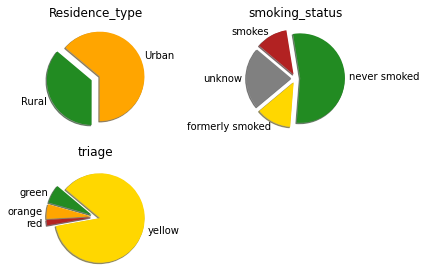

In [ ]:
plt.subplot(221)
plt.pie(df.groupby('Residence_type').size(), explode=(0.1,0.1), labels=np.unique(df.loc[:,'Residence_type']), colors=colors, shadow=True,startangle=140)
plt.title('Residence_type')
plt.subplot(222)
plt.pie(df.groupby('smoking_status').size(), explode=(0.1,0.1,0.1,0.1), labels=['unknow', 'formerly smoked', 'never smoked', 'smokes'], colors=['gray','gold','forestgreen','firebrick'], shadow=True,startangle=140)
plt.title('smoking_status')
plt.subplot(223)
plt.pie(df.groupby('triage').size(), explode=(0.1,0.1,0.1,0.1), labels=['green', 'orange', 'red', 'yellow'], colors=colors, shadow=True,startangle=140)
plt.title('triage')
plt.tight_layout()

Text(0.5, 1.0, 'heart_disease')

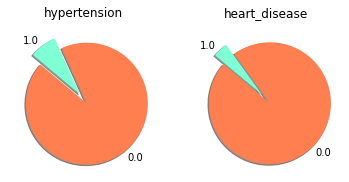

In [ ]:
sizes = df.groupby('hypertension').size()
plt.subplot(121)
plt.pie(sizes, explode=(0.1,0.1),
labels=np.unique(df.loc[:,'hypertension']), colors=['coral', 'aquamarine'], shadow=True, startangle=140)
plt.title('hypertension')
plt.subplot(122)
sizes = df.groupby('heart_disease').size()
plt.pie(sizes, explode=(0.1,0.1), labels=np.unique(df.loc[:,'heart_disease']), colors=['coral','aquamarine'], shadow=True,startangle=140)
plt.title('heart_disease')

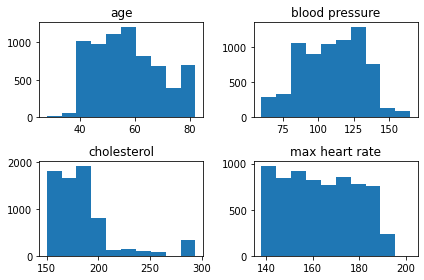

In [ ]:
names = df.columns.tolist()
names = ['age', 'blood pressure', 'cholesterol', 'max heart rate', 'plasma glucose', 'skin_thickness',
         'insulin', 'bmi']
names1 = names[:4]
names2 = names[4:]

for idx, name in enumerate(names1):
  plt.subplot(2,2,(idx+1))
  plt.hist(df[name])
  plt.title(name)
plt.tight_layout()

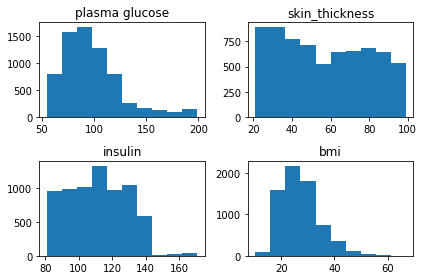

In [ ]:
for idx, name in enumerate(names2):
  plt.subplot(2,2,(idx+1))
  plt.hist(df[name])
  plt.title(name)
plt.tight_layout()

Text(0.5, 1.0, 'diabetes_pedigree')

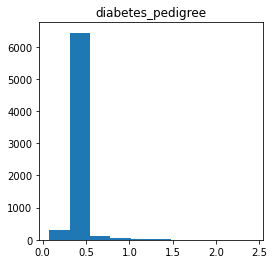

In [ ]:
plt.figure(figsize=(4,4))
plt.hist(df['diabetes_pedigree'])
plt.title('diabetes_pedigree')

# Análise e Pré-processamento dos dados

retiramos todos os valores nulos do dataset.

Verificamos também que o atributo **_exercise angina_**, que traduz-se como dor no peito quando realiza exercício, quando igual a 1 representa algum tipo de dor no peito, que sua vez já possui um outro atributo pra isso: **_chest pain type_**, portanto, poderemos remover o atributo **_exercise angina_**. Além deste, outros atributos irrelevantes foram removidos: **_Unnamed: 0_** (simplesmete um índece dos dados), e **_triage_** que é o atributo classe, portanto não deve estar presente, já que o objeto é a aplicação de algoritmos de aprendizado não supervisionado.

Fizemos a codificação dos dados categóricos **_Residende_type_** e **_smoking_status_**

Por fim, fizemos a normalização dos dados, pois alguns atributos possuem valores muitos distantes dos valores de outros atributos, o que prejudica a eficiência do K-means, que se baseia exatamente na distância dos dados.

In [ ]:
#fazendo a contagem das classes pra poder separá-las na hora de plotar o gráfico
#class_count = df['triage'].value_counts()
#print(class_count)

In [ ]:
#Retirando a coluna 'triage' temporariamente
#temp = df.iloc[:,17]
#df.drop(['triage'], axis=1, inplace=True)

In [ ]:
# Verificando em qual linha há valores nulos
#print(df[df.isnull().any(axis=1)])

<AxesSubplot:>

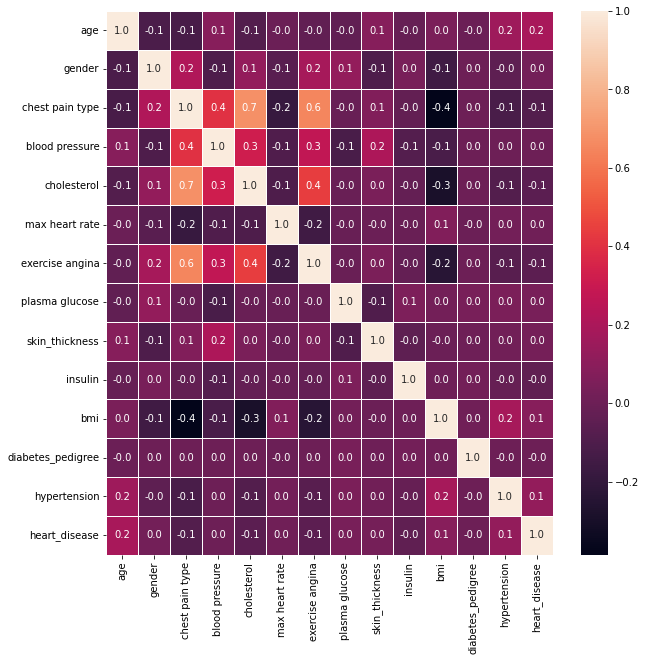

In [ ]:
data_cor = df.iloc[:,1:].corr()
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
_, ax = plt.subplots(figsize=(10,10))
sn.heatmap(data_cor, annot = True, fmt=".00001f", linewidths=.6, ax=ax)

In [ ]:
#Verificando que realmente a informção de 'exercice angina' está contida dentro de 'chest pain type'

teste = df.loc[:,'exercise angina']
ind = np.where(teste > 0)

chest_pain = df.loc[:,'chest pain type']
chest_pain = chest_pain.iloc[ind]
print(np.unique(chest_pain))

ind = np.where(chest_pain == 4)
print(list(set(aux.loc[ind, 'triage'])))

[1. 2. 3. 4.]
[nan, 'red', 'orange', 'yellow']


In [ ]:
# verificar se há valores nulos em cada coluna
null_counts = df.isna().sum()
print(null_counts)

Unnamed: 0             0
age                    0
gender                 1
chest pain type        0
blood pressure         0
cholesterol            0
max heart rate         0
exercise angina        0
plasma glucose         0
skin_thickness         0
insulin                0
bmi                    0
diabetes_pedigree      0
hypertension           0
heart_disease          0
Residence_type         0
smoking_status         0
triage               410
dtype: int64


In [ ]:
#excluindo tuplas com valores nulos
df = df.dropna()
aux = aux.dropna()
#print(df.iloc[4968])

In [ ]:
#verificando se todos os valores nulos foram exluídos
null_counts = df.isna().sum()
print(null_counts)

Unnamed: 0           0
age                  0
gender               0
chest pain type      0
blood pressure       0
cholesterol          0
max heart rate       0
exercise angina      0
plasma glucose       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
hypertension         0
heart_disease        0
Residence_type       0
smoking_status       0
triage               0
dtype: int64


In [ ]:
#Verificar os valores do atributo 'smoking_status'
smoking = df['smoking_status'].value_counts()
print(smoking)

never smoked       3543
Unknown            1386
formerly smoked     853
smokes              769
Name: smoking_status, dtype: int64


In [ ]:
#Codificação dos dados categóricos através da função map()
smoking_mapping = {'Unknown': 0, 'never smoked': 1, 'formerly smoked': 2, 'smokes': 3}
residence_mapping = {'Urban': 1, 'Rural': -1}

df['smoking_status_encoded'] = df['smoking_status'].map(smoking_mapping)
df['residence_type_encoded'] = df['Residence_type'].map(residence_mapping)

<AxesSubplot:>

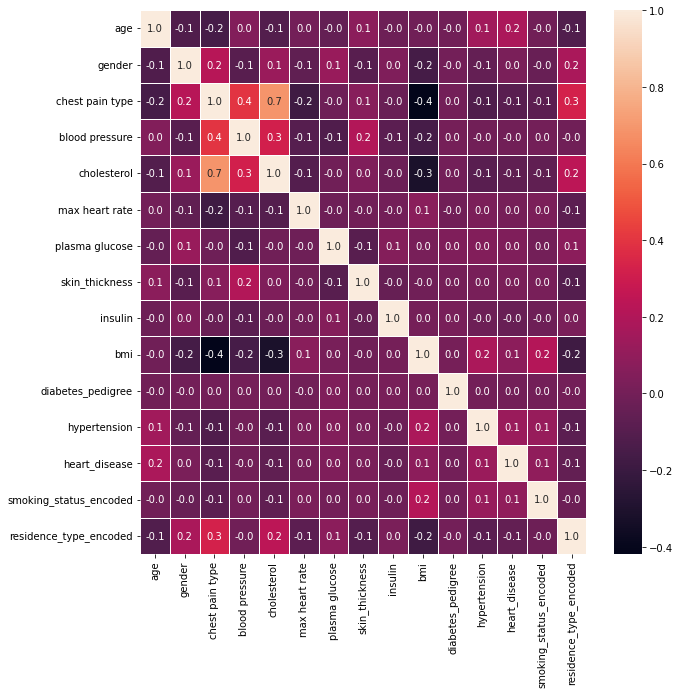

In [ ]:
# Removendo atributos desnecessários

df.drop(['Residence_type'], axis=1, inplace=True)
df.drop(['smoking_status'], axis=1, inplace=True)
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.drop(['exercise angina'], axis=1, inplace=True)
df.drop(['triage'], axis=1, inplace=True)

data_cor = df.corr()
_, ax = plt.subplots(figsize=(10,10))
sn.heatmap(data_cor, annot = True, fmt=".00001f", linewidths=.6, ax=ax)

In [ ]:
#Removendo atributos não relevantes para clustering
#coluna1 = df.iloc[:,0]
#df.drop(['exercise angina'], axis=1, inplace=True)
#df

In [ ]:
#Colocando os dados em ordem aleatória
#df = df.sample(frac=1)
#df = df.reset_index(drop=True)
#df

In [ ]:
#Exportação dos dados já processados
df.to_csv('patient_priority_processed.csv', index=False)

In [ ]:
#Normalização dos dados

dfKM = pd.read_csv('patient_priority_processed.csv')

from sklearn.preprocessing import StandardScaler

standsc= StandardScaler()
dfKM = standsc.fit_transform(dfKM)

# Aplicação dos algoritmos de aprendizado não supervisionado

### K-means
Aplicação do algoritmo k-means no conjunto de dados (sem a classe alvo), usando a classe `KMeans` e a função `fit()` (módulo `sklearn.cluster`). O número de grupos foi definido num intervalo de 1 a 10, e o algoritmo é aplicado para cada valor do intervalo.

Armazenamento do valor do índice soma quadrática das distâncias para todos os agrupamentos encontrados usando o atributo `inertia_` da classe `KMeans`, para análise do método do cotovelo.

Depois é feito o agrupamento com número de clusters igual a 4, e a predição das classes. A validação do agrupamento é feita pelos métodos Rand Index, Rand Idex Ajustado, Jaccard Index.

In [ ]:
#Aplicando o algoritmo K-means
import scipy.cluster.hierarchy as sch

#Ignora alguns warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

SomaQuadradoDistancia = [] #lista que vai armazenar o valor do índice soma quadrática das distâncias para todos os agrupamentos encontrados
K = range(1,10)
for k in K: #aplicação do algoritmo KMeans para todos os valores de grupos
  km = KMeans(n_clusters=k)
  km = km.fit(dfKM)
  SomaQuadradoDistancia.append(km.inertia_)

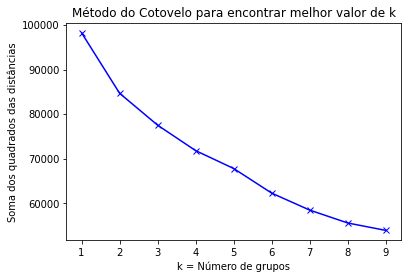

In [ ]:
#Gráficos dos índices encontrados para aplciar o método do cotovelo

plt.plot(K, SomaQuadradoDistancia, 'bx-')
plt.xlabel('k = Número de grupos')
plt.ylabel('Soma dos quadrados das distâncias')
plt.title('Método do Cotovelo para encontrar melhor valor de k')
plt.show()

# Visualização com dendrograma
dendogram = sch.dendrogram(sch.linkage(dfKM, method= 'ward', metric = 'euclidean'))

In [ ]:
#Aplicando o algoritmo K-means com n_clusters=4

#Ignora alguns warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

km = KMeans(n_clusters=4)
km = km.fit(dfKM)

In [ ]:
#Aplicando hold out
traindata = dfKM[:635,:]
testdata = dfKM[635:,:]

#aplica k-means sobre os dados, desconsiderando classes
kmeans = km.fit(traindata)

#Ajusta o modelo SVM aos dados de treino
predito = kmeans.predict(testdata)

unique, counts = np.unique(predito, return_counts=True)
print(dict(zip(unique, counts)))

{0: 982, 1: 1730, 2: 208, 3: 2996}


In [ ]:
#Aplicando o Rand Index para validação
from sklearn.metrics.cluster import rand_score

correto = aux['triage']
triage_mapping = {'green':1,'yellow':3,'orange':0,'red':1}
correto = correto.map(triage_mapping)
correto = correto.fillna(-1)
correto_final = correto.iloc[635:]

ri = rand_score(correto_final,predito)
print(ri)

0.44721342525992236


In [ ]:
#Supondo que o grupo amarelo foi divido em dois

predito[np.where(predito == 1)] = 3
correto = aux['triage']
triage_mapping = {'green':0,'yellow':3,'orange':2,'red':1}
correto = correto.map(triage_mapping)
correto = correto.fillna(-1)
correto_final = correto.iloc[635:]

ri = rand_score(correto_final,predito)
print(ri)

0.5968469820084736


In [ ]:
#Aplicando o Jaccard Index
from sklearn.metrics import jaccard_score

ji = jaccard_score(correto_final,predito,average='micro')
print(ji)

0.5488938342715015


### Extração de regras de associação com algoritmo Apriori

Aplicação do algoritmo apriori para extração de regras de associação ente os sintomas aprensentados, com Suporte e Confinça mínimas de 70%.

Neste caso, outros atributos foram retirados, por possuírem valores muito esparços e sendo assim, irrelevantes para extração de regras.


In [ ]:
#Instalar o pacote efficient-apriori
!pip install efficient-apriori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from efficient_apriori import apriori
dfApriori = pd.read_csv('patient_priority.csv')

In [ ]:
#class_count = df['diabetes_pedigree'].value_counts()
#print(class_count)

In [ ]:
#excluindo tuplas com valores nulos

dfApriori = dfApriori.dropna()
#dfApriori = dfApriori.drop(4968)
#print(dfApriori.iloc[4968])
#dfApriori

In [ ]:
#Codificação através da função map()
gender_mapping = {1: 'M', 0: 'F'}
chest_pain_mapping = {0:'Sem_dor_peito', 1:'dor_fraca_peito', 2:'dor_media_fraca_peito', 3:'dor_media_forte_peito', 4:'dor_forte_peito'}
hypertension_mapping = {0: 'no_hypertension', 1: 'hypertension'}
heart_disease_mapping = {0: 'no_heart_disease', 1: 'heart_disease'}

dfApriori['gender_encoded'] = dfApriori['gender'].map(gender_mapping)
dfApriori['chest_pain_type_encoded'] = dfApriori['chest pain type'].map(chest_pain_mapping)
dfApriori['hypertension_encoded'] = dfApriori['hypertension'].map(hypertension_mapping)
dfApriori['heart_disease_encoded'] = dfApriori['heart_disease'].map(heart_disease_mapping)

#Removendo colunas desnecessárias
dfApriori.drop(['Unnamed: 0','gender','chest pain type', 'hypertension','heart_disease','exercise angina','triage'], axis=1, inplace=True)

In [ ]:
#Transformar os dados para listas de listas
t_list = []
for i in range(dfApriori.shape[0]):
  l_in = []
  for j in range(dfApriori.shape[1]):
    s = str(dfApriori.values[i,j])
    l_in.append(s)
  t_list.append(l_in)


KeyboardInterrupt: ignored

In [ ]:
#Aplicação da função que extrai itemsets frequentes e regras de associação, com Suporte e Confinça mínimas de 50%.
itemsets, rules = apriori(t_list, min_support=0.7, min_confidence = 0.7)

In [ ]:
#Apresentação de todas as regras obtdos, com seus respectivos valores de suporte, confiança, lift e convicção.
for i in range(len(rules)):
  print(rules[i])

In [ ]:
#Removendo colunas desnecessárias (que não apresentaram nenhum valor nas regras obtidas)
dfApriori2 = dfApriori.drop(['age','blood pressure','cholesterol','max heart rate','plasma glucose','skin_thickness','insulin','bmi'], axis=1)

In [ ]:
#Transformar os dados para listas de listas
t_list = []
for i in range(dfApriori2.shape[0]):
  l_in = []
  for j in range(dfApriori2.shape[1]):
    s = str(dfApriori2.values[i,j])
    #if s != '?': #Deixando os valores ausentes de fora da lista
    l_in.append(s)
  t_list.append(l_in)

In [ ]:
#Aplicação da função que extrai itemsets frequentes e regras de associação, com Suporte e Confinça mínimas de 50%.
itemsets, rules = apriori(t_list, min_support=0.7, min_confidence = 0.7)

In [ ]:
#Apresentação de todas as regras obtdos, com seus respectivos valores de suporte, confiança, lift e convicção.
for i in range(len(rules)):
  print(rules[i])